<a href="https://colab.research.google.com/github/Pistolll/praktika1_TMOC/blob/main/01_TrainTestSplitBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разбиение на тестовую и обучающую выборку в Python

Задача:  разбить набо данных на обучающую и тестовую выборки

In [1]:
# Load relevant libraries.

%pylab inline
import matplotlib.pyplot as plt  # Импортируем библиотеку Matplotlib для создания графиков.
import numpy as np  # Импортируем NumPy для работы с массивами и математическими функциями.
import pandas as pd  # Импортируем Pandas для работы с данными в табличном формате.
import statsmodels.api as sm  # Импортируем Statsmodels для статистического моделирования.
import statsmodels.formula.api as smf  # Импортируем формулы Statsmodels для удобного задания моделей.
from statsmodels.graphics.api import abline_plot  # Импортируем функцию для добавления линий регрессии на графики.
import patsy  # Импортируем Patsy для преобразования данных в формат, подходящий для статистического моделирования.
import seaborn as sns  # Импортируем Seaborn для создания более красивых и информативных графиков.
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)  # Настраиваем стиль графиков Seaborn, чтобы они выглядели более профессионально и читабельно.
import sklearn as skl  # Импортируем библиотеку Scikit-learn для машинного обучения и анализа данных.

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd  # Импортируем библиотеку pandas для работы с данными в формате таблиц.

# URL для загрузки набора данных spambase из UCI Machine Learning Repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# Загрузка данных
column_names = [  # Определяем имена столбцов для загружаемого набора данных.
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "class"  # Последний столбец 'class' указывает, является ли сообщение спамом или нет.
]

spam = pd.read_csv(target_url, header=None, names=column_names)  # Загружаем данные из CSV файла по указанному URL, без заголовка, и присваиваем имена столбцам.

# Информация о данных
print(spam.info())  # Выводим информацию о загруженных данных, включая количество записей и типы данных в каждом столбце.

# Описание целевого столбца 'class'
print(spam['class'].describe())  # Выводим статистическое описание целевого столбца 'class', чтобы понять распределение классов (спам/не спам).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [3]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Вариант решения

### Использовать **pandas**

In [7]:
# Выбор случайной выборки из набора данных spam, которая составит 67% от общего объема данных
spamtrain = spam.sample(frac = 0.67, random_state = 1066)

# Удаление из набора данных spam всех строк, которые были выбраны для spamtrain, чтобы получить тестовый набор данных
spamtest = spam.drop(spamtrain.index)

# Подтверждение, что данные были разделены правильно, выводя количество классов в обучающем наборе
print(spamtrain['class'].count())

# Вывод количества классов в тестовом наборе
print(spamtest['class'].count())

# Вывод общего количества классов в исходном наборе данных spam для проверки
print(spam['class'].count())

3083
1518
4601


## Вариант решения

### Использовать **train_test_split** из **sklearn.model_selection**

In [19]:
from sklearn.model_selection import train_test_split  # Импортирует функцию train_test_split из библиотеки scikit-learn для разделения данных на обучающую и тестовую выборки.
import pandas as pd  # Импортирует библиотеку pandas для работы с данными в формате таблиц.

url = "https://raw.githubusercontent.com/Pistolll/praktika1_TMOC/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%201/01-task-train-test-split/north_korea_missile_test_database.csv"

# Загрузка данных
df = pd.read_csv(url)  # Загружает данные из CSV-файла "north_korea_missile_test_database.csv" в DataFrame df.
y = df["Missile Name"]  # Извлекает столбец "Missile Name" из DataFrame df и сохраняет его в переменной y (это целевая переменная).
X = df.drop("Missile Name", axis=1)  # Удаляет столбец "Missile Name" из DataFrame df и сохраняет оставшиеся данные в переменной X (это признаки).

# Разделяет данные на обучающую и тестовую выборки с использованием функции train_test_split.
# 80% данных будет использоваться для обучения (X_train, y_train), а 20% - для тестирования (X_test, y_test).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31  # Устанавливает размер тестовой выборки в 20% и фиксирует случайное состояние для воспроизводимости.
)

In [20]:
# Разделяет обучающую выборку на новую обучающую выборку и валидационную выборку.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,  # Использует текущие обучающие данные X_train и y_train для дальнейшего разделения.
    test_size=0.25,  # Устанавливает размер валидационной выборки в 25% от текущей обучающей выборки (что соответствует 20% от исходного набора данных).
    random_state=31  # Фиксирует случайное состояние для обеспечения воспроизводимости результатов.
)

In [21]:
len(X_train)

81

In [22]:
len(X_val)

27

In [23]:
len(X_test)

27

In [24]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

81
81
27
27
27
27


# Задания:
1. Подготовить pandas dataframe на основе "сырых" данных - https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/ **spambase.data spambase.names**
2. Провести его анализ на предмет сбалансированности классов.
3. Произвести разбиение на тестовую обучающую выборку с использованием https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html **sklearn.model_selection.StratifiedShuffleSplit** в соотношении **80/20**, **70/30**


1 Задание

In [25]:
import pandas as pd  # Импортирует библиотеку pandas, которая используется для работы с данными в формате таблиц (DataFrame).

# URL для загрузки данных
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"  # Указывает URL, откуда будут загружены данные набора данных Spambase.

# Названия столбцов из spambase.names
column_names = [  # Создает список названий столбцов, которые будут использоваться в DataFrame.
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "class"  # Последний столбец 'class' указывает, является ли сообщение спамом или нет.
]

# Загрузка данных в DataFrame
spam_df = pd.read_csv(data_url, header=None, names=column_names)  # Загружает данные из указанного URL в DataFrame, устанавливая названия столбцов.

# Просмотр первых строк
print(spam_df.head())  # Выводит первые 5 строк DataFrame для предварительного просмотра загруженных данных.

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

2 Задание

Распределение классов:
class
0    0.605955
1    0.394045
Name: proportion, dtype: float64


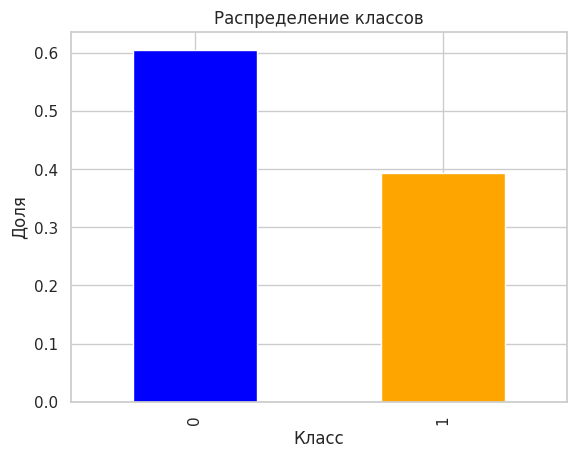

In [26]:
# Распределение классов
# Вычисляем распределение классов в столбце 'class' и нормализуем значения, чтобы получить доли
class_distribution = spam_df['class'].value_counts(normalize=True)

# Выводим распределение классов на экран
print("Распределение классов:")
print(class_distribution)

# Импортируем библиотеку для визуализации
import matplotlib.pyplot as plt

# Строим столбчатую диаграмму для визуализации распределения классов
class_distribution.plot(kind='bar', color=['blue', 'orange'])

# Устанавливаем заголовок графика
plt.title("Распределение классов")

# Устанавливаем подпись для оси X
plt.xlabel("Класс")

# Устанавливаем подпись для оси Y
plt.ylabel("Доля")

# Отображаем график
plt.show()

3 Задание

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

# Создание объекта StratifiedShuffleSplit
# Этот объект будет использоваться для разбиения данных на обучающую и тестовую выборки с учетом распределения классов.
sss_80_20 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
sss_70_30 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Разбиение 80/20
# Цикл для получения индексов обучающей и тестовой выборок с использованием метода split.
for train_index, test_index in sss_80_20.split(spam_df, spam_df['class']):
    # Создание обучающей выборки на 80% данных
    train_80_20 = spam_df.iloc[train_index]
    # Создание тестовой выборки на 20% данных
    test_80_20 = spam_df.iloc[test_index]

# Разбиение 70/30
# Цикл для получения индексов обучающей и тестовой выборок с использованием метода split.
for train_index, test_index in sss_70_30.split(spam_df, spam_df['class']):
    # Создание обучающей выборки на 70% данных
    train_70_30 = spam_df.iloc[train_index]
    # Создание тестовой выборки на 30% данных
    test_70_30 = spam_df.iloc[test_index]

# Проверка размеров выборок
# Вывод размеров обучающей и тестовой выборок для разбиения 80/20
print("80/20 Разбиение:")
print(f"Обучающая выборка: {train_80_20.shape}")
print(f"Тестовая выборка: {test_80_20.shape}")

# Вывод размеров обучающей и тестовой выборок для разбиения 70/30
print("\n70/30 Разбиение:")
print(f"Обучающая выборка: {train_70_30.shape}")
print(f"Тестовая выборка: {test_70_30.shape}")

80/20 Разбиение:
Обучающая выборка: (3680, 58)
Тестовая выборка: (921, 58)

70/30 Разбиение:
Обучающая выборка: (3220, 58)
Тестовая выборка: (1381, 58)
